Creating a random classification dataset.

In [1]:
from sklearn.datasets import make_classification
import numpy as np

X,y = make_classification(
    n_samples = 100,
    n_features = 2,
    n_informative = 1,
    n_redundant = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    random_state =41,
    hypercube = False,
    class_sep =10
)


Plotting the generated data for understanding it properly.

In [2]:
import matplotlib.pyplot as plt

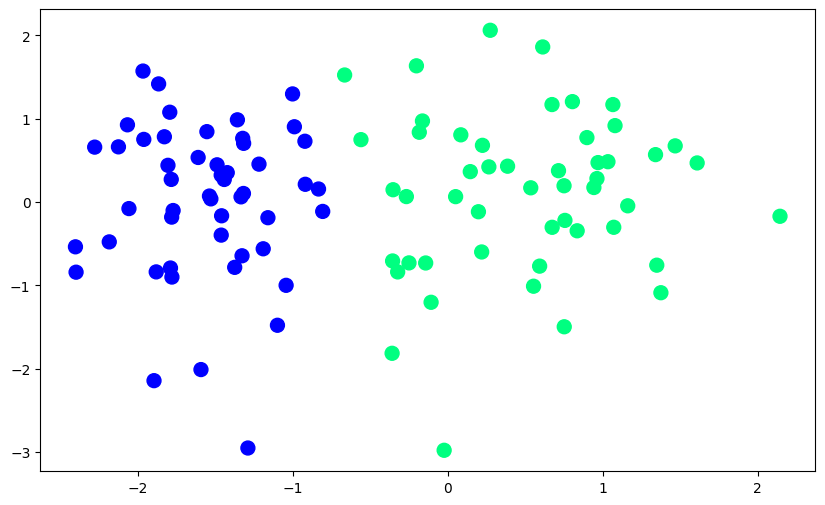

In [3]:
plt.figure(figsize =(10,6))
plt.scatter(X[:,0],X[:,1],c=y,s=100,cmap = 'winter')

We can see that the independent dataset is 2 dimensional.

In [4]:
def step(z):
  return 1 if z>0 else 0

In [5]:
def perceptron(X,y):

  X = np.insert(X,0,1,axis=1)  # axis 1 means to apply and insert 1 to the X dataset in the 0th column position.
  weights = np.ones(X.shape[1]) #initialize the weights as 1 ; the X.shape[1] gives the number of columns, so to assign that many weights with zero value.
  lr = 0.1                      #learning rate

  for i in range(1000):
    j = np.random.randint(0,100)
    y_hat = step(np.dot(X[j],weights))
    weights = weights + lr*(y[j]-y_hat)*X[j]

  return weights[0],weights[1:]




In [6]:
intercept,coefficients = perceptron(X,y)

In [7]:
print(intercept)
print(coefficients)

0.9
[1.31165024 0.20121894]


For plotting the line learnt by the perceptron we will require the slope and coefficients.


```
m = -A/B
b = -C/B
```



In [8]:
m = -(coefficients[0]/coefficients[1])
b = -(intercept/coefficients[1])

Now plotting the line

In [9]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

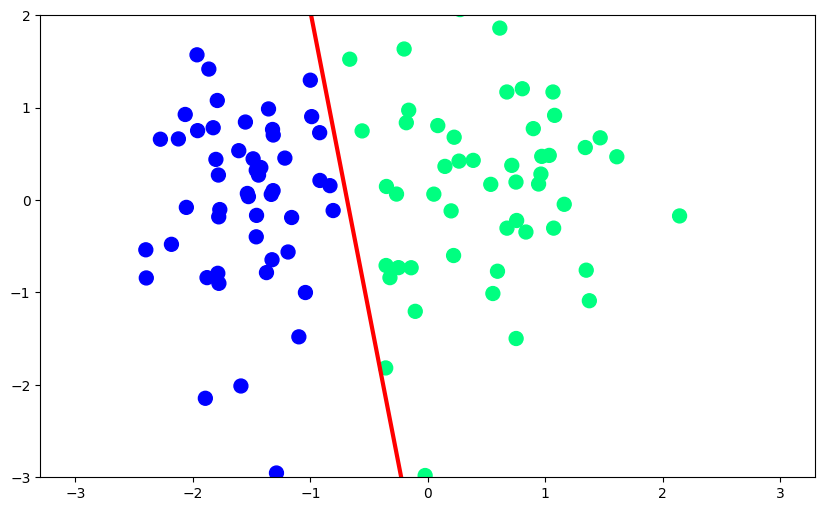

In [10]:
plt.figure(figsize = (10,6))
plt.plot(x_input,y_input,color = 'red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap = 'winter',s=100)
plt.ylim(-3,2)

Here by the perceptron trick this line is the classifier

##### We can see how the line moved through each epochs by the following annimation.**bold text**

In [11]:
def animate_perceptron(X, y):
    m = []
    b = []

    x = np.insert(X, 0, 1, axis=1)
    weights = np.ones(X.shape[1] + 1)  # Initialize weights with bias term
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(x[j], weights))
        weights = weights + lr * (y[j] - y_hat) * x[j]

        m.append(-(weights[1] / weights[2]))
        b.append(-(weights[0] / weights[2]))
    return m, b

m, b = animate_perceptron(X, y)


In [12]:
m,b = animate_perceptron(X,y)

In [13]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from IPython.display import HTML

In [14]:
fig, ax = plt.subplots(figsize = (9,5))

x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0] + b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i,x_i*m[0] + b[0], 'r-', linewidth = 2)
plt.ylim(-3,3)
def update(i):
  label = 'epoch {0}'.format(i+1)
  line.set_ydata(x_i*m[i] + b[i])
  ax.set_xlabel(label)

anim = FuncAnimation(fig, update, repeat=True, frames = 200, interval = 100)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>